<a href="https://colab.research.google.com/github/Gsebs/Data_Science/blob/main/hagrid_dislike_or_like_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network (CNN)

This tutorial demonstrates training a simple [Convolutional Neural Network](https://developers.google.com/machine-learning/glossary/#convolutional_neural_network) (CNN) to classify [CIFAR images](https://www.cs.toronto.edu/~kriz/cifar.html). Because this tutorial uses the [Keras Sequential API](https://www.tensorflow.org/guide/keras/overview), creating and training your model will take just a few lines of code.


### Import TensorFlow

In [7]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import cv2 as cv

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:
!unzip '/content/drive/MyDrive/newdislike.zip'

Archive:  /content/drive/MyDrive/newdislike.zip
replace newdislike/test_images_dislike/00481821-8795-4011-bc0a-67f99fa53cac.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: newdislike/test_images_dislike/00481821-8795-4011-bc0a-67f99fa53cac.jpg  
  inflating: newdislike/test_images_dislike/00713c1a-007e-4651-bef5-09c4019f19c6.jpg  
  inflating: newdislike/test_images_dislike/012210d4-d9d4-423b-bb5a-d014c8e34832.jpg  
  inflating: newdislike/test_images_dislike/01883f07-2dc8-4e88-b2da-01e7149b6029.jpg  
  inflating: newdislike/test_images_dislike/02015171-9f41-4eee-8956-c3e198d23de8.jpg  
  inflating: newdislike/test_images_dislike/02121efb-618f-4a71-9549-0f33b89f08b3.jpg  
  inflating: newdislike/test_images_dislike/02613d4b-1fad-4f32-818a-aaccc0d39f7a.jpg  
  inflating: newdislike/test_images_dislike/02638b22-b4a8-44d3-b726-ad9858d1f1f5.jpg  
  inflating: newdislike/test_images_dislike/02859656-e7e2-4e37-8d43-fa4eb2795f84.jpg  
  inflating: newdislike/test_images_dislike/0288

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

For our project, we decided to make a model that can classify whether an image has a thumbs up or thumbs down. The dataset has 200 images in the 2 classes, like and dislike, with 100 images in each class. Both 100 images are split into 75 training images and 25 test images.

In [10]:
from tqdm import tqdm
import imageio as iio

In [11]:
# TEST
# load the image and convert into
# numpy array
d1 = 'newdislike/train_images_dislike/'
d2 = 'newdislike/test_images_dislike/'
l1 = 'newdislike/train_images_like/'
l2 = 'newdislike/test_images_like/'

resized_d1 = []
resized_d2 = []
resized_l1 = []
resized_l2 = []

size = (32, 32)

# train_dislike
for filename in tqdm(os.listdir(d1)):
    if filename.endswith("jpg"): 
        img = iio.imread(d1 + filename)
        res = cv.resize(img, size)
        res2 = np.asarray(res)
        resized_d1.append(res)

# test_dislike
for filename in tqdm(os.listdir(d2)):
    if filename.endswith("jpg"): 
        img = iio.imread(d2 + filename)
        res = cv.resize(img, size)
        res2 = np.asarray(res)
        resized_d2.append(res)

# train_like
for filename in tqdm(os.listdir(l1)):
    if filename.endswith("jpg"): 
        img = iio.imread(l1 + filename)
        res = cv.resize(img, size)
        res2 = np.asarray(res)
        resized_l1.append(res)

# test_like
for filename in tqdm(os.listdir(l2)):
    if filename.endswith("jpg"): 
        img = iio.imread(l2 + filename)
        res = cv.resize(img, size)
        res2 = np.asarray(res)
        resized_l2.append(res2)


100%|██████████| 25/25 [00:00<00:00, 458.10it/s]


In [12]:
resized_d1.extend(resized_l1)
train1 = resized_d1

In [13]:
resized_d2.extend(resized_l2)
test1 = resized_d2

In [14]:
label_train = []
label_test = []

for i in range(75):
  label_train.append(0)

for i in range(75):
  label_train.append(1)

for i in range(25):
  label_test.append(0)

for i in range(25):
  label_test.append(1)

In [15]:
label_train = np.asarray(label_train, dtype='uint8')
label_test = np.asarray(label_test, dtype='uint8')

In [16]:
# (train_images, train_labels), (test_images, test_labels) = (train1, label_train), (test1, label_test)

train_images = train1
train_labels = label_train
test_images = test1
test_labels = label_test

# Normalize pixel values to be between 0 and 1
train_images, test_images = (np.asarray(train_images)) / 255.0, (np.asarray(test_images)) / 255.0

In [17]:
# (a, b), (c, d) = datasets.cifar10.load_data()

# # Normalize pixel values to be between 0 and 1
# a, c = a / 255.0, c / 255.0

In [18]:
# b[0]

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image:


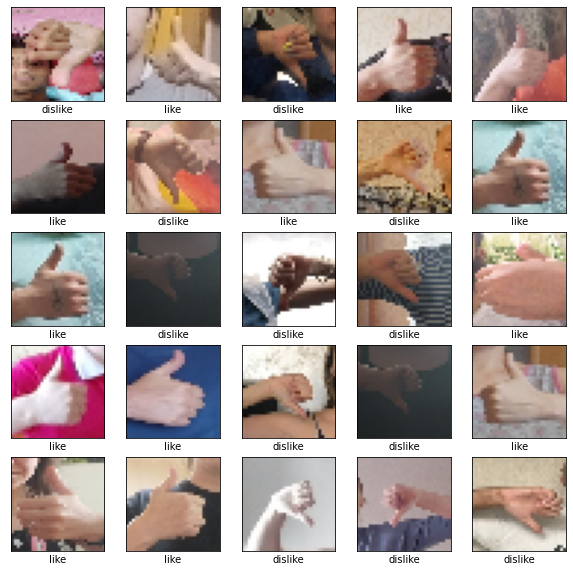

In [19]:
from random import seed
from random import randint

class_names = ['dislike', 'like']

plt.figure(figsize=(10,10))
for i in range(25):
    num = randint(0, 149)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[num])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[num]])
plt.show()

### Create the convolutional base

The 6 lines of code below define the convolutional base using a common pattern: a stack of [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) and [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument `input_shape` to your first layer.


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [21]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

Here's the complete architecture of your model:

In [23]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels))

Epoch 1/50
5/5 [==============================] - 12s 141ms/step - loss: 0.6803 - accuracy: 0.6000 - val_loss: 0.6715 - val_accuracy: 0.5400
Epoch 2/50
5/5 [==============================] - 0s 10ms/step - loss: 0.6581 - accuracy: 0.5533 - val_loss: 0.6086 - val_accuracy: 0.7000
Epoch 3/50
5/5 [==============================] - 0s 9ms/step - loss: 0.5934 - accuracy: 0.7600 - val_loss: 0.5473 - val_accuracy: 0.8800
Epoch 4/50
5/5 [==============================] - 0s 9ms/step - loss: 0.4757 - accuracy: 0.8800 - val_loss: 0.4193 - val_accuracy: 0.8200
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.3296 - accuracy: 0.9000 - val_loss: 0.4152 - val_accuracy: 0.7600
Epoch 6/50
5/5 [==============================] - 0s 10ms/step - loss: 0.2463 - accuracy: 0.8933 - val_loss: 0.3925 - val_accuracy: 0.8400
Epoch 7/50
5/5 [==============================] - 0s 10ms/step - loss: 0.2937 - accuracy: 0.8733 - val_loss: 0.2141 - val_accuracy: 0.9000
Epoch 8/50
5/5 [===========

### Evaluate the model

2/2 - 0s - loss: 0.2248 - accuracy: 0.9400 - 19ms/epoch - 9ms/step


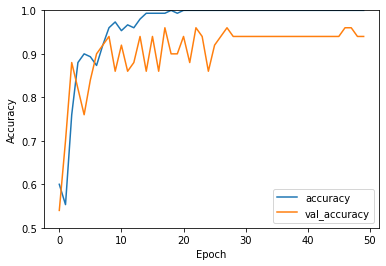

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [26]:
print(test_acc)

0.9399999976158142


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.

## Retrieve Trained Layers

Let us first take a look at the model by using *.get_weights* method.

In [27]:
len(model.get_weights())

10

In [28]:
[model.get_weights()[i].shape for i in range(10)]

[(3, 3, 3, 32),
 (32,),
 (3, 3, 32, 64),
 (64,),
 (3, 3, 64, 64),
 (64,),
 (1024, 64),
 (64,),
 (64, 2),
 (2,)]

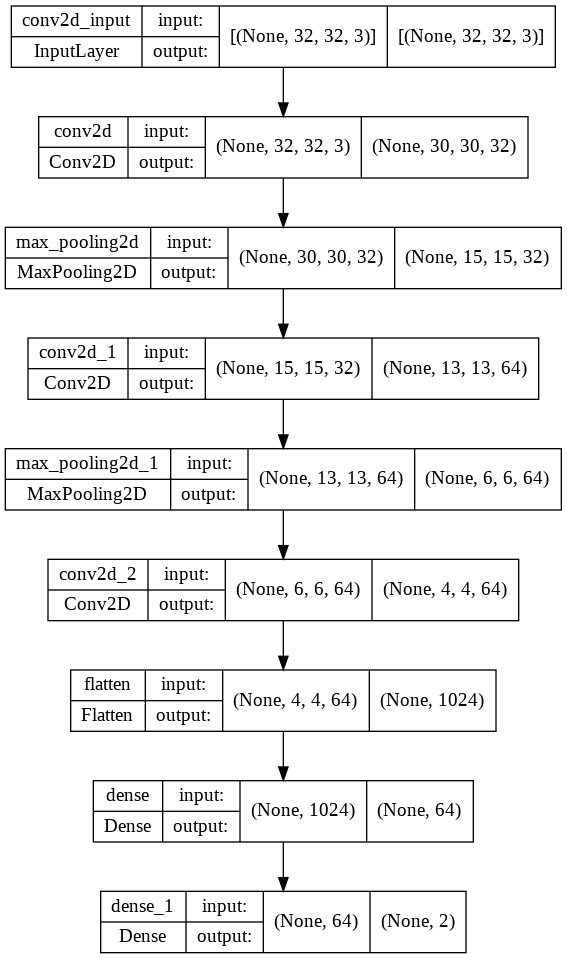

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [30]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 8.1 MB/s 


In [31]:
import visualkeras

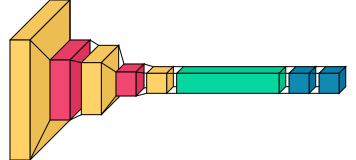

In [32]:
visualkeras.layered_view(model)

In [33]:
model.inputs

[<KerasTensor: shape=(None, 32, 32, 3) dtype=float32 (created by layer 'conv2d_input')>]

In [34]:
model.output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_1')>

In [57]:
model.get_layer('conv2d_3').output

<KerasTensor: shape=(None, 30, 30, 32) dtype=float32 (created by layer 'conv2d_3')>

In [58]:
tmp_engine = tf.keras.models.Model(
    inputs=model.inputs,
    outputs=model.get_layer('conv2d_3').output)

In [59]:
train_images.shape

(150, 32, 32, 3)

In [60]:
tmp_engine.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [61]:
tmp_conv2d_1_layer_for_this_sample = tmp_engine(train_images[0].reshape((1, 32, 32, 3)))
tmp_conv2d_1_layer_for_this_sample.shape

TensorShape([1, 30, 30, 32])

In [62]:
tmp_conv2d_1_layer_for_this_sample.shape[3]

32

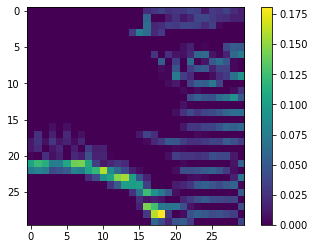

In [63]:
plt.imshow(tmp_conv2d_1_layer_for_this_sample[0,:,:,7])
plt.colorbar()

The original picture is printed as well.

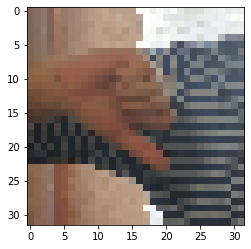

In [37]:
plt.imshow(train_images[0])

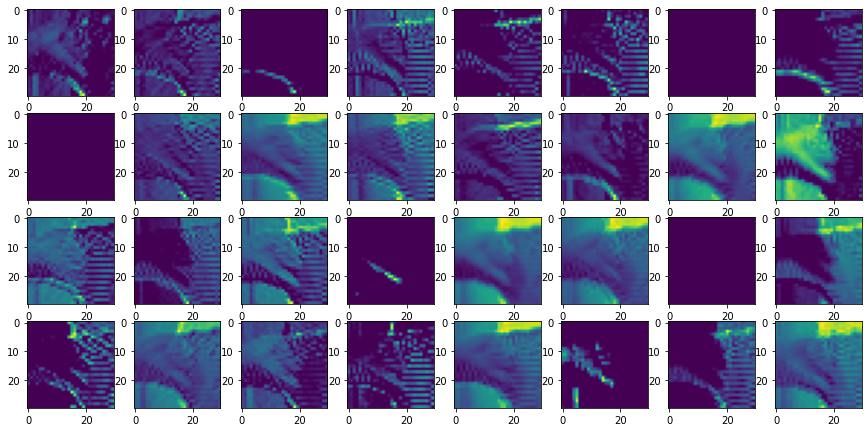

In [64]:
plt.figure(figsize=(15,15))
for i in range(tmp_conv2d_1_layer_for_this_sample.shape[3]):
    plt.subplot(8, 8, i+1)
    plt.imshow(tmp_conv2d_1_layer_for_this_sample[0,:,:,i])

plt.show()

In [39]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model so far:

In [40]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically,  as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

### Add Dense layers on top

To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D,  then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [44]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(26))
model.add(layers.Dense(13))
model.add(layers.Dense(9))
model.add(layers.Dense(2, activation='softmax'))



Here's the complete architecture of your model:

In [45]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

### Compile and train the model

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 3s 180ms/step - loss: 0.6180 - accuracy: 0.7800 - val_loss: 0.5642 - val_accuracy: 0.8800
Epoch 2/25
5/5 [==============================] - 0s 13ms/step - loss: 0.4827 - accuracy: 0.9933 - val_loss: 0.4342 - val_accuracy: 0.9400
Epoch 3/25
5/5 [==============================] - 0s 12ms/step - loss: 0.3507 - accuracy: 1.0000 - val_loss: 0.4044 - val_accuracy: 0.8800
Epoch 4/25
5/5 [==============================] - 0s 11ms/step - loss: 0.2223 - accuracy: 1.0000 - val_loss: 0.2487 - val_accuracy: 0.9400
Epoch 5/25
5/5 [==============================] - 0s 12ms/step - loss: 0.1204 - accuracy: 1.0000 - val_loss: 0.2199 - val_accuracy: 0.9400
Epoch 6/25
5/5 [==============================] - 0s 12ms/step - loss: 0.0555 - accuracy: 1.0000 - val_loss: 0.3528 - val_accuracy: 0.8800
Epoch 7/25
5/5 [==============================] - 0s 12ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 0.2903 - val_accuracy: 0.9200
Epoch 8/25
5/5 [=====================

### Evaluate the model

2/2 - 0s - loss: 0.4674 - accuracy: 0.9400 - 20ms/epoch - 10ms/step


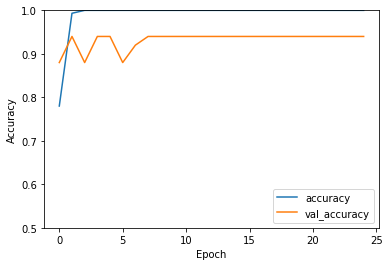

In [47]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [48]:
print(test_acc, test_loss)

0.9399999976158142 0.4674029052257538


Your simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code! For another CNN style, check out the [TensorFlow 2 quickstart for experts](https://www.tensorflow.org/tutorials/quickstart/advanced) example that uses the Keras subclassing API and `tf.GradientTape`.

## Retrieve Trained Layers

Let us first take a look at the model by using *.get_weights* method.

In [49]:
len(model.get_weights())

30

In [50]:
[model.get_weights()[i].shape for i in range(10)]

[(3, 3, 3, 32),
 (32,),
 (3, 3, 32, 64),
 (64,),
 (3, 3, 64, 64),
 (64,),
 (1024, 64),
 (64,),
 (64, 32),
 (32,)]

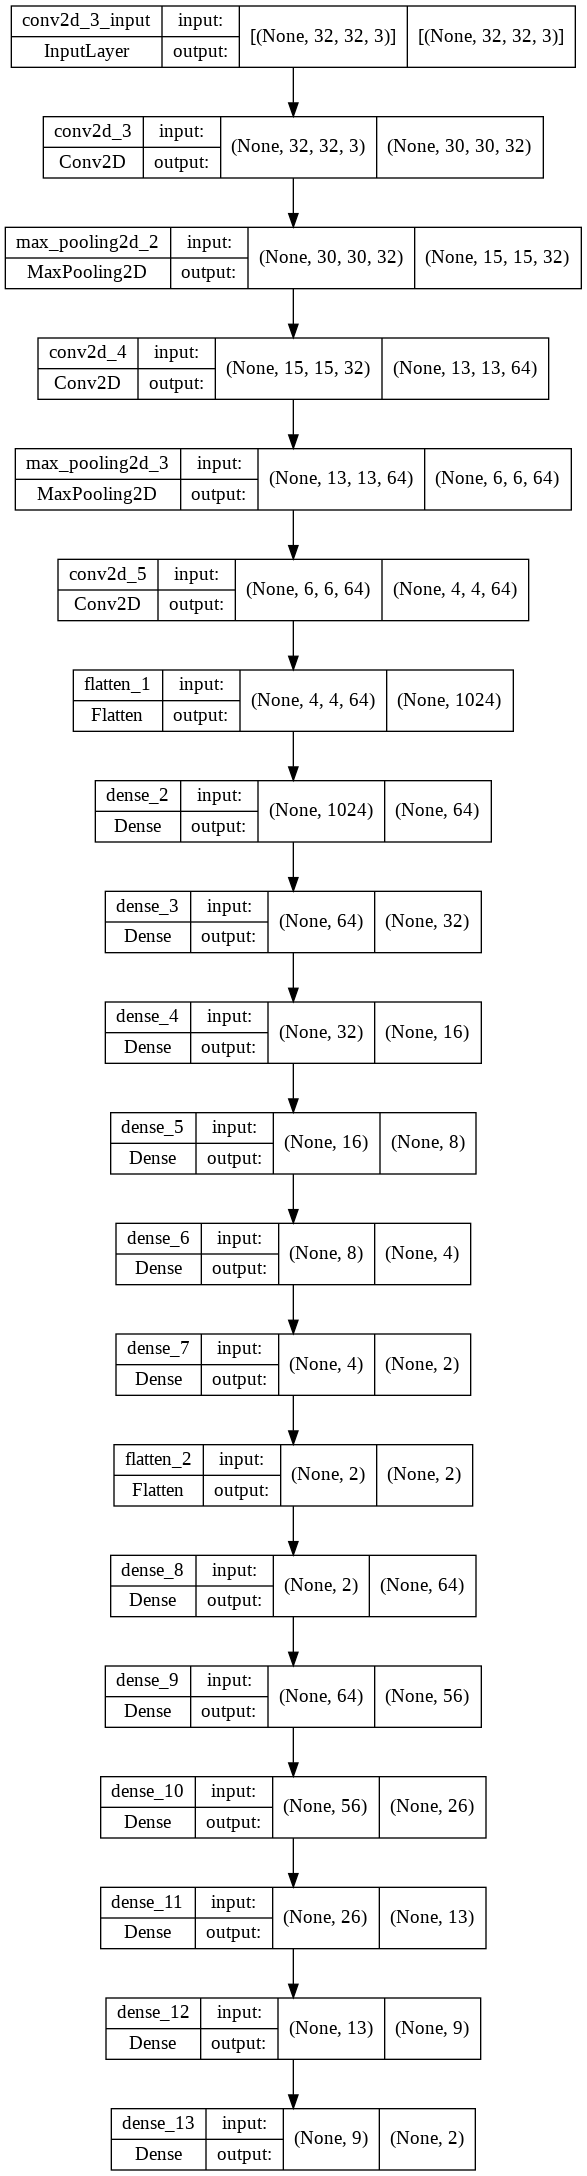

In [51]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [52]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import visualkeras

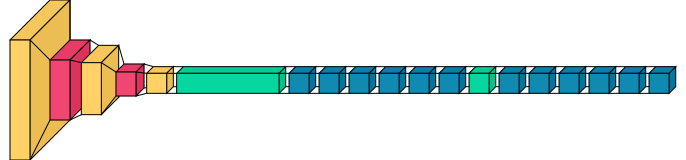

In [54]:
visualkeras.layered_view(model)